In [1]:
pip install librosa numpy pandas matplotlib seaborn scikit-learn tensorflow


Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install torch


Note: you may need to restart the kernel to use updated packages.


In [3]:
import torch

# Load category names
category_names = torch.load("/Users/abhi/Downloads/EmoGator-main/data/category_names.pt")
print(category_names)  # Check the mapping


['Adoration', 'Amusement', 'Anger', 'Awe', 'Confusion', 'Contempt', 'Contentment', 'Desire', 'Disappointment', 'Disgust', 'Distress', 'Ecstasy', 'Elation', 'Embarrassment', 'Fear', 'Guilt', 'Interest', 'Neutral', 'Pain', 'Pride', 'Realization', 'Relief', 'Romantic Love', 'Sadness', 'Serenity', 'Shame', 'Surprise (Negative)', 'Surprise (Positive)', 'Sympathy', 'Triumph']


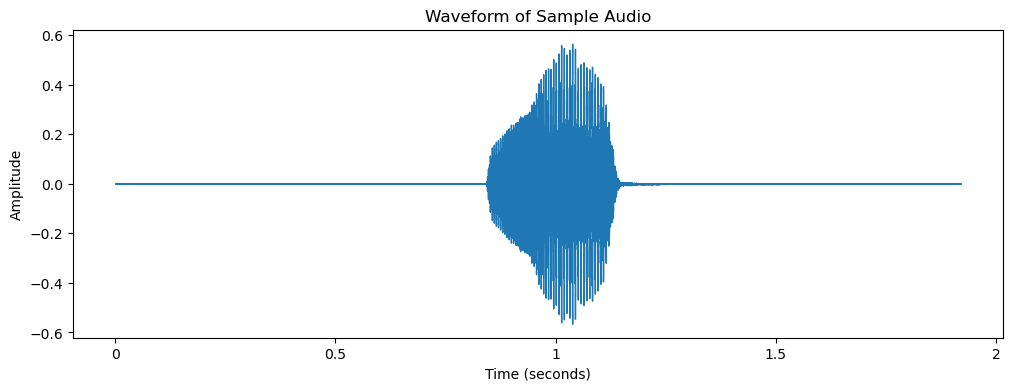

Sample Rate: 48000
Audio Length: 1.92 seconds


In [4]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
import os

# Path to an audio file (choose a random sample from the dataset)
mp3_folder = "/Users/abhi/Downloads/EmoGator-main/data/mp3"
sample_file = os.path.join(mp3_folder, os.listdir(mp3_folder)[0])  # Load first file

# Load the audio file
y, sr = librosa.load(sample_file, sr=None)  # Load with original sample rate

# Plot waveform
plt.figure(figsize=(12, 4))
librosa.display.waveshow(y, sr=sr)
plt.title("Waveform of Sample Audio")
plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude")
plt.show()

print(f"Sample Rate: {sr}")
print(f"Audio Length: {len(y)/sr:.2f} seconds")


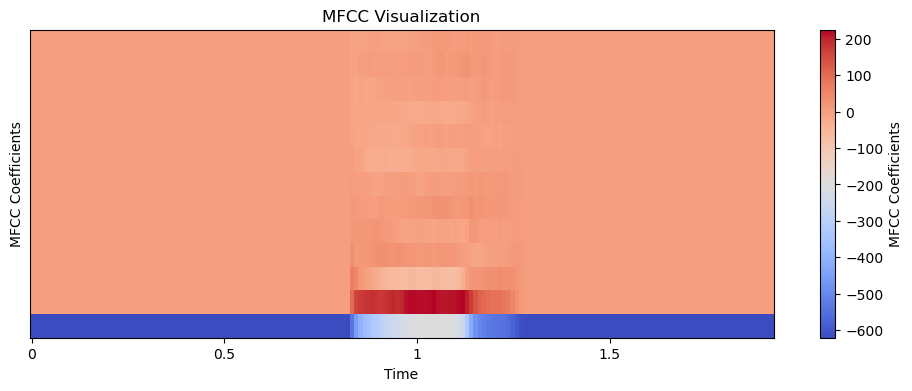

MFCC shape: (13, 181)


In [5]:
# Extract MFCC features
mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)

# Visualize MFCCs
plt.figure(figsize=(12, 4))
librosa.display.specshow(mfccs, x_axis="time", sr=sr)
plt.colorbar(label="MFCC Coefficients")
plt.title("MFCC Visualization")
plt.xlabel("Time")
plt.ylabel("MFCC Coefficients")
plt.show()

print(f"MFCC shape: {mfccs.shape}")


In [6]:
# Normalize MFCCs
normalized_mfccs = (mfccs - np.mean(mfccs)) / np.std(mfccs)
print("MFCCs Normalized")


MFCCs Normalized


In [27]:
from sklearn.model_selection import train_test_split

# List all audio files
mp3_files = [f for f in os.listdir(mp3_folder) if f.endswith(".mp3")]

# Split dataset
train_files, test_files = train_test_split(mp3_files, test_size=0.2, random_state=42)

print(f"Training set: {len(train_files)} files")
print(f"Testing set: {len(test_files)} files")


Training set: 25704 files
Testing set: 6426 files


In [29]:
import re

def get_label_from_filename(filename):
    match = re.search(r'\d{5}-(\d{2})-\d', filename)  # Extract the middle 2-digit number
    if match:
        label_index = int(match.group(1))  # Convert to integer
        if 0 <= label_index < len(category_names):  # Ensure valid range
            return category_names[label_index]  # Map to category name
    return "Unknown"  # Default if extraction fails

# Test the function
sample_file = train_files[0]
sample_label = get_label_from_filename(sample_file)
print(f"Sample file: {sample_file}, Emotion Label: {sample_label}")


Sample file: 000069-02-2.mp3, Emotion Label: Anger


In [31]:
def extract_features_and_label(file_path):
    y, sr = librosa.load(file_path, sr=None)
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
    normalized_mfccs = (mfccs - np.mean(mfccs)) / np.std(mfccs)

    # Extract label from filename
    label = get_label_from_filename(file_path)
    
    return normalized_mfccs, label

# Example usage
features, label = extract_features_and_label(os.path.join(mp3_folder, train_files[0]))
print(f"Extracted features shape: {features.shape}, Label: {label}")


Extracted features shape: (13, 181), Label: Anger


In [33]:
# Prepare dataset
X_train, y_train = [], []
X_test, y_test = [], []

# Process training data
for file in train_files:
    features, label = extract_features_and_label(os.path.join(mp3_folder, file))
    X_train.append(features)
    y_train.append(label)

# Process testing data
for file in test_files:
    features, label = extract_features_and_label(os.path.join(mp3_folder, file))
    X_test.append(features)
    y_test.append(label)

print(f"Training data size: {len(X_train)}, Testing data size: {len(X_test)}")


Training data size: 25704, Testing data size: 6426


In [35]:
mfcc_lengths = [x.shape[1] for x in X_train]
print(f"Min length: {min(mfcc_lengths)}, Max length: {max(mfcc_lengths)}")


Min length: 40, Max length: 192


In [37]:
mfcc_shapes = [x.shape for x in X_train]
print(set(mfcc_shapes))  # Show unique shapes in the dataset


{(13, 143), (13, 88), (13, 152), (13, 97), (13, 161), (13, 106), (13, 170), (13, 179), (13, 136), (13, 81), (13, 145), (13, 90), (13, 154), (13, 99), (13, 163), (13, 108), (13, 172), (13, 129), (13, 74), (13, 138), (13, 83), (13, 147), (13, 92), (13, 156), (13, 101), (13, 122), (13, 186), (13, 131), (13, 140), (13, 85), (13, 149), (13, 94), (13, 158), (13, 51), (13, 115), (13, 124), (13, 188), (13, 133), (13, 78), (13, 142), (13, 87), (13, 151), (13, 117), (13, 62), (13, 181), (13, 126), (13, 71), (13, 190), (13, 135), (13, 80), (13, 144), (13, 89), (13, 153), (13, 46), (13, 110), (13, 174), (13, 119), (13, 183), (13, 128), (13, 192), (13, 137), (13, 82), (13, 103), (13, 167), (13, 112), (13, 57), (13, 176), (13, 121), (13, 185), (13, 130), (13, 139), (13, 96), (13, 105), (13, 169), (13, 114), (13, 178), (13, 123), (13, 68), (13, 187), (13, 132), (13, 98), (13, 162), (13, 107), (13, 171), (13, 116), (13, 125), (13, 189), (13, 134), (13, 91), (13, 155), (13, 100), (13, 164), (13, 109), 

In [39]:
import numpy as np

# Define fixed length for time steps
fixed_length = 200  # Set based on the max shape or desired value

def pad_or_truncate(mfcc, target_length=fixed_length):
    """
    Pads or truncates MFCCs to match the fixed time step length.
    """
    if mfcc.shape[1] > target_length:  # Truncate if longer
        return mfcc[:, :target_length]
    elif mfcc.shape[1] < target_length:  # Pad if shorter
        pad_width = target_length - mfcc.shape[1]
        return np.pad(mfcc, ((0, 0), (0, pad_width)), mode='constant')  # Pad time axis
    return mfcc

# Apply to all training & test data
X_train_fixed = np.array([pad_or_truncate(x) for x in X_train])
X_test_fixed = np.array([pad_or_truncate(x) for x in X_test])

print(f"New X_train shape: {X_train_fixed.shape}, New X_test shape: {X_test_fixed.shape}")


New X_train shape: (25704, 13, 200), New X_test shape: (6426, 13, 200)


In [40]:
X_train = np.expand_dims(X_train_fixed, axis=-1)  # Add channel dimension for CNN
X_test = np.expand_dims(X_test_fixed, axis=-1)

print(f"Final X_train shape: {X_train.shape}, X_test shape: {X_test.shape}")


Final X_train shape: (25704, 13, 200, 1), X_test shape: (6426, 13, 200, 1)


In [43]:
import collections

# Check training label distribution
label_counts = collections.Counter(y_train)
print("Training Label Distribution:", label_counts)

# Check testing label distribution
label_counts_test = collections.Counter(y_test)
print("Testing Label Distribution:", label_counts_test)


Training Label Distribution: Counter({'Contempt': 888, 'Surprise (Positive)': 886, 'Awe': 875, 'Confusion': 872, 'Pain': 872, 'Amusement': 871, 'Disappointment': 869, 'Fear': 868, 'Pride': 866, 'Elation': 864, 'Embarrassment': 860, 'Realization': 859, 'Interest': 859, 'Surprise (Negative)': 858, 'Shame': 856, 'Relief': 853, 'Distress': 853, 'Romantic Love': 852, 'Sadness': 851, 'Triumph': 851, 'Guilt': 851, 'Disgust': 850, 'Serenity': 848, 'Ecstasy': 848, 'Contentment': 845, 'Anger': 840, 'Desire': 839, 'Sympathy': 838, 'Neutral': 833, 'Unknown': 829})
Testing Label Distribution: Counter({'Unknown': 242, 'Neutral': 238, 'Sympathy': 233, 'Desire': 232, 'Anger': 231, 'Contentment': 226, 'Ecstasy': 223, 'Serenity': 223, 'Disgust': 221, 'Triumph': 220, 'Sadness': 220, 'Guilt': 220, 'Romantic Love': 219, 'Relief': 218, 'Distress': 218, 'Shame': 215, 'Surprise (Negative)': 213, 'Realization': 212, 'Interest': 212, 'Embarrassment': 211, 'Elation': 207, 'Pride': 205, 'Fear': 203, 'Disappointme

In [45]:
# Keep only selected emotions
selected_emotions = ["Anger", "Happiness", "Sadness", "Fear", "Surprise"]
filtered_indices = [i for i, label in enumerate(y_train) if label in selected_emotions]

# Filter training and testing sets
X_train_filtered = X_train[filtered_indices]
y_train_filtered = [y_train[i] for i in filtered_indices]

# Apply the same filtering to test data
filtered_indices_test = [i for i, label in enumerate(y_test) if label in selected_emotions]
X_test_filtered = X_test[filtered_indices_test]
y_test_filtered = [y_test[i] for i in filtered_indices_test]


In [47]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

# Encode filtered labels as integers
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train_filtered)
y_test_encoded = label_encoder.transform(y_test_filtered)

# Convert integer labels to one-hot encoding
y_train_categorical = to_categorical(y_train_encoded, num_classes=len(selected_emotions))
y_test_categorical = to_categorical(y_test_encoded, num_classes=len(selected_emotions))

print(f"New y_train_categorical shape: {y_train_categorical.shape}")
print(f"New y_test_categorical shape: {y_test_categorical.shape}")


2025-02-04 11:33:30.652917: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


New y_train_categorical shape: (2559, 5)
New y_test_categorical shape: (654, 5)


In [49]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

# Define the CNN model with the correct output shape
model = Sequential([
    Conv2D(32, (3, 3), activation="relu", padding="same", input_shape=(13, 200, 1)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),

    Conv2D(64, (3, 3), activation="relu", padding="same"),
    BatchNormalization(),
    MaxPooling2D((2, 2)),

    Conv2D(128, (3, 3), activation="relu", padding="same"),
    BatchNormalization(),
    MaxPooling2D((2, 2)),

    Flatten(),
    Dense(128, activation="relu"),
    Dropout(0.5),
    Dense(len(selected_emotions), activation="softmax")  # Correct output shape
])

# Compile the model again
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

# Print model summary
model.summary()


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 13, 200, 32)    │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 13, 200, 32)    │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 6, 100, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 6, 100, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 6, 100, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 3, 50, 64)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 3, 50, 128)     │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 3, 50, 128)     │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 1, 25, 128)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 3200)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       409,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 503,941 (1.92 MB)

 Trainable params: 503,493 (1.92 MB)

 Non-trainable params: 448 (1.75 KB)

In [51]:
history = model.fit(
    X_train_filtered, y_train_categorical,
    epochs=30,
    batch_size=32,
    validation_data=(X_test_filtered, y_test_categorical)
)


Epoch 1/30
80/80 ━━━━━━━━━━━━━━━━━━━━ 10s 104ms/step - accuracy: 0.3813 - loss: 2.1890 - val_accuracy: 0.0000e+00 - val_loss: 4.4479
Epoch 2/30
80/80 ━━━━━━━━━━━━━━━━━━━━ 9s 110ms/step - accuracy: 0.5090 - loss: 0.9642 - val_accuracy: 0.0566 - val_loss: 5.0625
Epoch 3/30
80/80 ━━━━━━━━━━━━━━━━━━━━ 9s 111ms/step - accuracy: 0.5859 - loss: 0.8632 - val_accuracy: 0.3364 - val_loss: 4.1161
Epoch 4/30
80/80 ━━━━━━━━━━━━━━━━━━━━ 10s 124ms/step - accuracy: 0.5865 - loss: 0.8390 - val_accuracy: 0.3593 - val_loss: 2.8221
Epoch 5/30
80/80 ━━━━━━━━━━━━━━━━━━━━ 11s 138ms/step - accuracy: 0.5747 - loss: 0.8049 - val_accuracy: 0.3685 - val_loss: 1.6728
Epoch 6/30
80/80 ━━━━━━━━━━━━━━━━━━━━ 10s 122ms/step - accuracy: 0.6101 - loss: 0.7984 - val_accuracy: 0.6315 - val_loss: 0.8138
Epoch 7/30
80/80 ━━━━━━━━━━━━━━━━━━━━ 11s 143ms/step - accuracy: 0.6284 - loss: 0.7585 - val_accuracy: 0.6239 - val_loss: 0.7828
Epoch 8/30
80/80 ━━━━━━━━━━━━━━━━━━━━ 11s 137ms/step - accuracy: 0.6349 - loss: 0.7462 - val_ac

In [53]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(
    X_train_filtered, y_train_categorical,
    epochs=50,  # Train longer, but stop early if needed
    batch_size=32,
    validation_data=(X_test_filtered, y_test_categorical),
    callbacks=[early_stopping]
)


Epoch 1/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 12s 151ms/step - accuracy: 0.8324 - loss: 0.3725 - val_accuracy: 0.7018 - val_loss: 0.8571
Epoch 2/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 13s 160ms/step - accuracy: 0.8386 - loss: 0.3789 - val_accuracy: 0.6804 - val_loss: 1.0127
Epoch 3/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 12s 152ms/step - accuracy: 0.8318 - loss: 0.3816 - val_accuracy: 0.6606 - val_loss: 0.9129
Epoch 4/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 11s 138ms/step - accuracy: 0.8370 - loss: 0.3705 - val_accuracy: 0.6514 - val_loss: 1.1703
Epoch 5/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 11s 143ms/step - accuracy: 0.8477 - loss: 0.3487 - val_accuracy: 0.6529 - val_loss: 1.3672
Epoch 6/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 12s 153ms/step - accuracy: 0.8596 - loss: 0.3232 - val_accuracy: 0.6636 - val_loss: 1.1386


In [55]:
test_loss, test_accuracy = model.evaluate(X_test_filtered, y_test_categorical)
print(f"Test Accuracy: {test_accuracy:.4f}, Test Loss: {test_loss:.4f}")


21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.6945 - loss: 0.9177
Test Accuracy: 0.7018, Test Loss: 0.8571


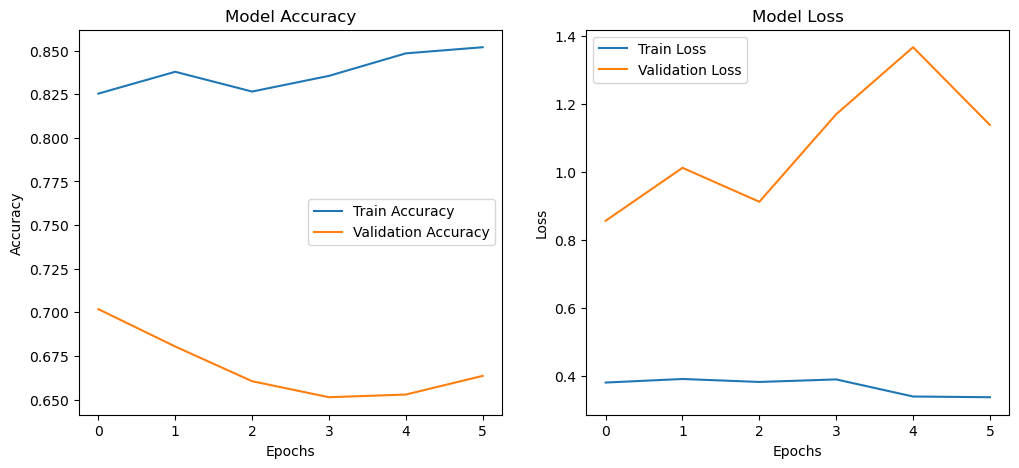

In [57]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

# Plot Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Accuracy')

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Model Loss')

plt.show()


In [59]:
model.save("filtered_emotion_recognition_model.keras")


In [61]:
from tensorflow.keras.optimizers import Adam
model.compile(optimizer=Adam(learning_rate=0.0003), loss="categorical_crossentropy", metrics=["accuracy"])


In [161]:
from tensorflow.keras.layers import Dropout

# Example: Increase Dropout
model.add(Dense(512, activation="relu"))
model.add(Dropout(0.6))  # Increase from 0.5 to 0.6
model.add(Dense(3, activation="softmax"))  # 30 categories
model.add(Dropout(0.6))  # Increase from 0.5 to 0.6


In [65]:
from tensorflow.keras.regularizers import l2

model.add(Dense(512, activation="relu", kernel_regularizer=l2(0.001)))
model.add(Dense(256, activation="relu", kernel_regularizer=l2(0.001)))


In [67]:
import os

mp3_folder = "/Users/abhi/Downloads/EmoGator-main/data/mp3/"
mp3_files = [f for f in os.listdir(mp3_folder) if f.endswith(".mp3")]




In [69]:
file_path = os.path.join(mp3_folder, mp3_files[0])  # Change index to select another file


In [71]:
print(file_path)

/Users/abhi/Downloads/EmoGator-main/data/mp3/000214-18-1.mp3


In [73]:
import librosa
import numpy as np

def add_noise(data, noise_level=0.02):
    noise = noise_level * np.random.randn(len(data))
    return data + noise

def time_shift(data, shift_max=0.2):
    shift = int(len(data) * shift_max * np.random.uniform(-1, 1))
    return np.roll(data, shift)

def stretch_audio(data, rate=0.8):
    return librosa.effects.time_stretch(y=data, rate=rate)  # Fixed function call

# Load the audio file in mono
y, sr = librosa.load("/Users/abhi/Downloads/EmoGator-main/data/mp3/000214-18-1.mp3", sr=None, mono=True)

# Apply augmentations
y_augmented = add_noise(y)
y_shifted = time_shift(y)
y_stretched = stretch_audio(y)  # Now correctly formatted


In [75]:
import os

data_dir = "/Users/abhi/Downloads/EmoGator-main/data/mp3/"
file_paths = [os.path.join(data_dir, f) for f in os.listdir(data_dir) if f.endswith(".mp3")]

print(f"Total files found: {len(file_paths)}")


Total files found: 32130


In [77]:
augmented_data = []
augmented_labels = []

for i, file_path in enumerate(file_paths):  # Iterate over your dataset
    y, sr = librosa.load(file_path, sr=None)

    # Apply augmentations
    y_aug1 = add_noise(y)
    y_aug2 = time_shift(y)
    y_aug3 = stretch_audio(y)

    # Extract MFCC features
    mfcc_original = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
    mfcc_aug1 = librosa.feature.mfcc(y=y_aug1, sr=sr, n_mfcc=13)
    mfcc_aug2 = librosa.feature.mfcc(y=y_aug2, sr=sr, n_mfcc=13)
    mfcc_aug3 = librosa.feature.mfcc(y=y_aug3, sr=sr, n_mfcc=13)

    # Normalize and store
    for mfcc in [mfcc_original, mfcc_aug1, mfcc_aug2, mfcc_aug3]:
        mfcc = (mfcc - np.mean(mfcc)) / (np.std(mfcc) + 1e-6)  # Normalize
        augmented_data.append(mfcc)
        augmented_labels.append(get_label_from_filename(file_path))  # Extract label


In [83]:
for i, data in enumerate(augmented_data):
    print(f"Index {i}: Shape {data.shape}")


IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)




Index 102510: Shape (13, 181)
Index 102511: Shape (13, 226)
Index 102512: Shape (13, 181)
Index 102513: Shape (13, 181)
Index 102514: Shape (13, 181)
Index 102515: Shape (13, 226)
Index 102516: Shape (13, 181)
Index 102517: Shape (13, 181)
Index 102518: Shape (13, 181)
Index 102519: Shape (13, 226)
Index 102520: Shape (13, 181)
Index 102521: Shape (13, 181)
Index 102522: Shape (13, 181)
Index 102523: Shape (13, 226)
Index 102524: Shape (13, 181)
Index 102525: Shape (13, 181)
Index 102526: Shape (13, 181)
Index 102527: Shape (13, 226)
Index 102528: Shape (13, 188)
Index 102529: Shape (13, 188)
Index 102530: Shape (13, 188)
Index 102531: Shape (13, 235)
Index 102532: Shape (13, 184)
Index 102533: Shape (13, 184)
Index 102534: Shape (13, 184)
Index 102535: Shape (13, 230)
Index 102536: Shape (13, 181)
Index 102537: Shape (13, 181)
Index 102538: Shape (13, 181)
Index 102539: Shape (13, 226)
Index 102540: Shape (13, 181)
Index 102541: Shape (13, 181)
Index 102542: Shape (13, 181)
Index 102

In [85]:
def pad_or_truncate(data, target_length=200):
    if data.shape[1] > target_length:  # Truncate
        return data[:, :target_length]
    elif data.shape[1] < target_length:  # Pad
        pad_width = target_length - data.shape[1]
        return np.pad(data, ((0, 0), (0, pad_width)), mode='constant')
    return data

# Apply padding/truncation to all augmented data
augmented_data_fixed = [pad_or_truncate(data) for data in augmented_data]


In [157]:
y_train_categorical = to_categorical(y_train_encoded, num_classes=num_classes)
y_test_categorical = to_categorical(y_test_encoded, num_classes=num_classes)


In [159]:
print(f"y_train_categorical shape: {y_train_categorical.shape}")  # Should be (2559, 3)
print(f"y_test_categorical shape: {y_test_categorical.shape}")    # Should be (654, 3)


y_train_categorical shape: (2559, 3)
y_test_categorical shape: (654, 3)


In [163]:
model.compile(optimizer=Adam(learning_rate=0.0003), loss="categorical_crossentropy", metrics=["accuracy"])


In [165]:
print(f"X_train_augmented shape: {X_train_augmented.shape}")
print(f"y_train_augmented shape: {y_train_augmented.shape}")
print(f"y_test_categorical shape: {y_test_categorical.shape}")


X_train_augmented shape: (127950, 13, 200)
y_train_augmented shape: (127950, 3)
y_test_categorical shape: (654, 3)


In [ ]:
history = model.fit(
    X_train_augmented, y_train_augmented,
    epochs=50,   # Adjust if needed
    batch_size=32,  # Adjust if needed
    validation_data=(X_test_filtered, y_test_categorical),
    callbacks=[early_stopping]  # If using early stopping
)


Epoch 1/50
3999/3999 ━━━━━━━━━━━━━━━━━━━━ 1260s 314ms/step - accuracy: 0.3323 - loss: nan - val_accuracy: 0.3104 - val_loss: 1.0998
Epoch 2/50
3999/3999 ━━━━━━━━━━━━━━━━━━━━ 419s 105ms/step - accuracy: 0.3319 - loss: nan - val_accuracy: 0.3104 - val_loss: 1.1001
Epoch 3/50
3999/3999 ━━━━━━━━━━━━━━━━━━━━ 409s 102ms/step - accuracy: 0.3338 - loss: nan - val_accuracy: 0.3104 - val_loss: 1.1006
Epoch 4/50
3999/3999 ━━━━━━━━━━━━━━━━━━━━ 434s 109ms/step - accuracy: 0.3330 - loss: nan - val_accuracy: 0.3104 - val_loss: 1.0996
Epoch 5/50
3999/3999 ━━━━━━━━━━━━━━━━━━━━ 436s 109ms/step - accuracy: 0.3338 - loss: nan - val_accuracy: 0.3104 - val_loss: 1.1000
Epoch 6/50
3999/3999 ━━━━━━━━━━━━━━━━━━━━ 438s 110ms/step - accuracy: 0.3340 - loss: nan - val_accuracy: 0.3104 - val_loss: 1.1002
Epoch 7/50
3999/3999 ━━━━━━━━━━━━━━━━━━━━ 470s 117ms/step - accuracy: 0.3311 - loss: nan - val_accuracy: 0.3104 - val_loss: 1.0989
Epoch 8/50
3999/3999 ━━━━━━━━━━━━━━━━━━━━ 461s 115ms/step - accuracy: 0.3273 - los